In [1]:
from DataLoader import getPreprocessedDataOnGPU

x_train , y_train , x_test , y_test = getPreprocessedDataOnGPU()

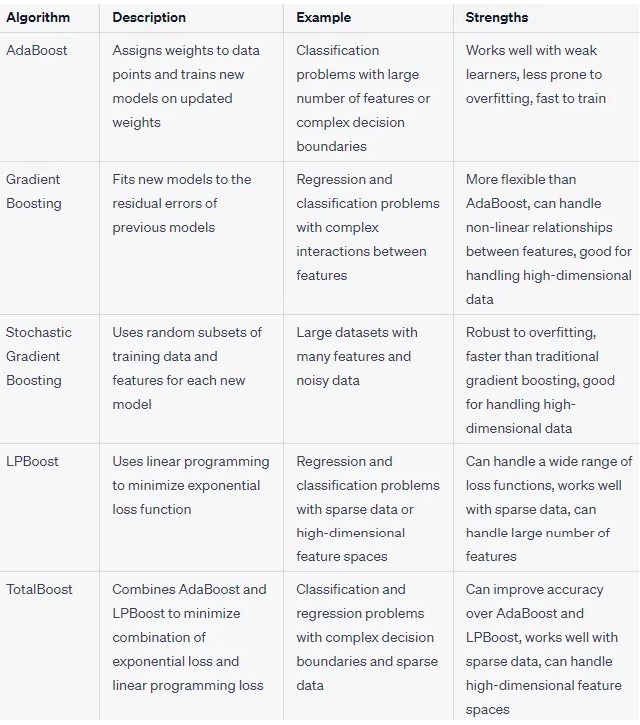

# developping of weak classifier 

In [2]:
from sklearn.tree import DecisionTreeClassifier
# Train multiple decision trees as weak classifiers
weak_classifiers = []
for i in range(2):
    dtc = DecisionTreeClassifier(criterion='gini',
                            splitter="random",
                            max_depth=37,random_state=42)
    dtc.fit(x_train.to_numpy(), y_train.to_numpy())
    weak_classifiers.append(dtc)

In [3]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
# Train AdaBoostClassifier using weak classifiers
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='gini',
                            splitter="random",
                            max_depth=37, random_state=42),
                         n_estimators=5,
                         algorithm='SAMME.R',
                         learning_rate=0.5,
                         random_state=42)
ada.fit(x_train.to_numpy(), y_train.to_numpy())


/home/nehdilinux/anaconda3/envs/rapids-24.04/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=37,
                                                    random_state=42,
                                                    splitter='random'),
                   learning_rate=0.5, n_estimators=5, random_state=42)

In [4]:
y_pred = ada.predict(x_test.to_numpy())

In [5]:
from sklearn.metrics import f1_score
print('F1-score:', f1_score(y_test.to_numpy(), y_pred, average='weighted'))

F1-score: 0.81420145538108
